In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation, rc
    
GIT = 'https://github.com/tyokokur/tmpdat/raw/main/int/'

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim', 'plot_pha', 'ticks']


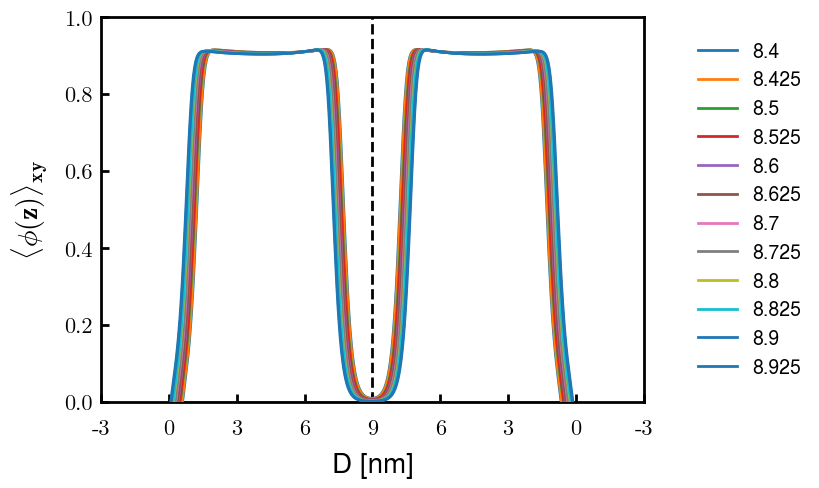

In [50]:
# SYSG Explore
labs = [8.4, 8.425, 8.5, 8.525, 8.6, 8.625, 8.7, 8.725, 8.8, 8.825, 8.9, 8.925]
read_list = [GIT+'ph_a040d{:05.0f}.dat'.format(i*1000) for i in labs]
max_d = 9 #Distance to center (Lx/2)
shifts = [max_d-float(i) for i in labs]
fig, ax = tjy.plot_pha(read_list, x1_shift=shifts,
                       x1_start = -10, x1_end=max_d*2+10, y1_end=1.00, labs=labs, double=False, show=False)
plt.sca(ax)
plt.plot([max_d]*2,[0,1], '--', lw =2, color='k')
step = 3 
plt.xlim(-step, step)
xrange = np.arange(-1*step, max_d*2+step+0.1, step)
xsim = np.concatenate([np.arange(-1*step, max_d+0.1, step), np.arange(max_d-step, -1*(step+0.1), -step)])
plt.xticks(xrange, ['{:.0f}'.format(i) for i in xsim])
plt.xlabel('D [nm]')
plt.legend(frameon=True, framealpha=1.0, facecolor='w', edgecolor='w', loc='center left', bbox_to_anchor=(1.05,0.5))
plt.show()

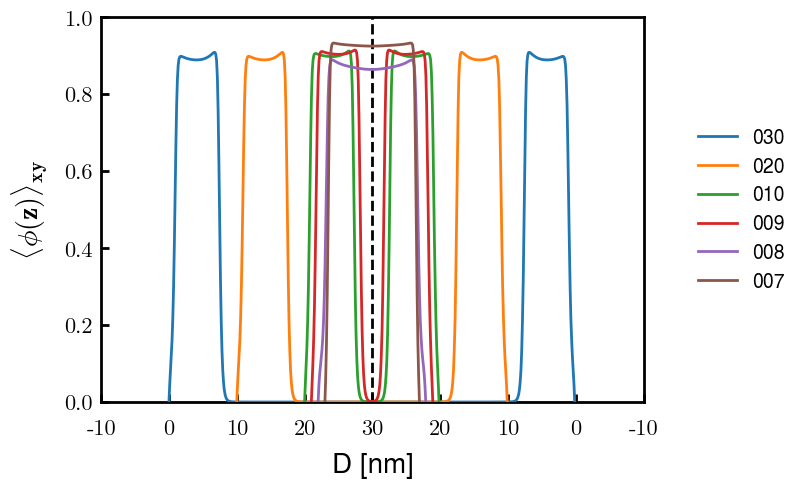

In [20]:
# SYSG 
labs = [30, 40]
read_list = [GIT+'ph_p1d{:05d}.dat'.format(int(i*1000)) for i in labs]
# labs = ['{:03d}'.format(i) for i in np.concatenate([np.arange(50, 19, -10)])]
# read_list = [GIT+'ph_p2d{}.dat'.format(i) for i in labs]
max_d = 30 #Distance to center (Lx/2)
shifts = [max_d-float(i) for i in labs]
block_Ni = [[5]]*len(read_list)
fig, ax = tjy.plot_pha(read_list, x1_shift=shifts,
                       x1_start = -10, x1_end=max_d*2+10, y1_end=1.00, labs=labs, double=False, show=False)

plt.sca(ax)
plt.plot([max_d]*2,[0,1], '--', lw =2, color='k')
step = 10
xrange = np.arange(-10, max_d*2+step+0.1, step)
xsim = np.concatenate([np.arange(-10, max_d+0.1, step), np.arange(max_d-step, -10.1, -step)])
plt.xticks(xrange, ['{:.0f}'.format(i) for i in xsim])
plt.xlabel('D [nm]')
plt.legend(frameon=True, framealpha=1.0, facecolor='w', edgecolor='w', loc='center left', bbox_to_anchor=(1.05,0.5))
plt.show()

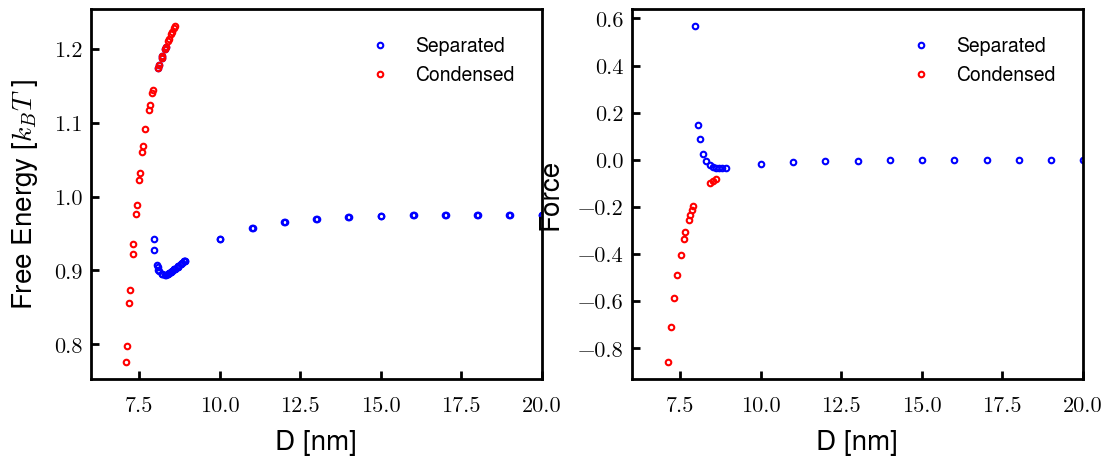

In [61]:
from scipy.interpolate import UnivariateSpline
freeE = pd.read_csv(GIT+'int_p1f1.txt', sep="\s+", skiprows=0, names = ['it', 'lx', 'freeE', 'freeDiff', 'inCompMax', 'andErr']).sort_values(by='lx', ignore_index=True)
d, y = freeE.lx/2, freeE.freeE
freeE = pd.read_csv(GIT+'int_p1f2.txt', sep="\s+", skiprows=0, names = ['it', 'lx', 'freeE', 'freeDiff', 'inCompMax', 'andErr']).sort_values(by='lx', ignore_index=True)
dd, yy = freeE.lx/2, freeE.freeE
freeE = pd.read_csv(GIT+'int_p12.txt', sep="\s+", skiprows=0, names = ['it', 'lx', 'freeE', 'freeDiff', 'inCompMax', 'andErr']).sort_values(by='lx', ignore_index=True)
d2, y2 = freeE.lx/2, freeE.freeE
freeE = pd.read_csv(GIT+'p1_sep.txt', sep="\s+", skiprows=0, names = ['it', 'lx', 'freeE', 'freeDiff', 'inCompMax', 'andErr']).sort_values(by='lx', ignore_index=True)
ds, ys = freeE.lx/2, freeE.freeE
freeE = pd.read_csv(GIT+'p1_con.txt', sep="\s+", skiprows=0, names = ['it', 'lx', 'freeE', 'freeDiff', 'inCompMax', 'andErr']).sort_values(by='lx', ignore_index=True)
dc, yc = freeE.lx/2, freeE.freeE

## Raw Force Data
xf1 = [17.825/2, 17.625/2, 17.425/2, 17.225/2, 17.025/2, 16.825/2] #p1_f1
yf1 = [-0.03572,  -0.0368, -0.03688, -0.03524, -0.03132, -0.02272] #p1_f1 
xf2 = [14.225/2, 14.425/2, 14.625/2, 14.825/2, 15.025/2, 15.225/2, 15.625/2, 15.825/2] #p1_f2
yf2 = [-0.8592 , -0.708  , -0.58656, -0.4874 , -0.4052 , -0.3372 , -0.2348 , -0.1972 ] #p1_f2
xc1 = [15.325/2, 15.525/2, 15.725/2, 16.825/2, 17.025/2, 17.225/2] #p1_sep2, p1_con
yc1 = [ -0.308 , -0.2564 , -0.2148 ,  -0.0988,  -0.0896,  -0.0820] #p1_sep2, p1_con
xs1 = [16.625/2, 16.425/2, 16.225/2, 16.125/2, 15.925/2] #p1_sep, p1_sep2
ys1 = [-0.00664,   0.0242,  0.08808,  0.14908, 0.56716 ] #p1_sep, p1_sep2
xs2 = [40.025/2, 38.025/2, 36.025/2, 34.025/2, 32.025/2, 30.025/2, 28.025/2, 26.025/2,  24.025/2,  22.025/2, 20.025/2  ] #p1_4
ys2 = [  -4e-05,   -8e-05, -1.6e-04, -3.2e-04, -5.6e-04,-1.04e-03,-1.84e-03,-3.332e-03,-6.04e-03,-1.056e-02, -1.932e-02] #p1_4

## Plotting
fs = (plt.rcParams['figure.figsize'][0]*2,  plt.rcParams['figure.figsize'][1])
f, axs = plt.subplots(1,2, figsize=fs)
axs[0].plot(d2, y2, 'o', ms=4, markerfacecolor='none',  c='blue', label='_Raw p1_4')
axs[0].plot(ds, ys, 'o', ms=4, markerfacecolor='none',  c='blue', label='Separated')
axs[0].plot(d, y,   'o', ms=4, markerfacecolor='none',  c='blue', label='_Sep')
axs[0].plot(dc, yc, 'o', ms=4, markerfacecolor='none',  c='red',  label='Condensed')
axs[0].plot(dd, yy, 'o', ms=4, markerfacecolor='none',  c='red',  label='_Con')
# axs[0].plot(d_new, csfit, c='C1', label='Cubic Spline')
axs[0].set_xlim(6,20)

axs[1].plot(xf1, yf1, 'o', ms=4, markerfacecolor='none', c='blue', label='Separated')
axs[1].plot(xs1, ys1, 'o', ms=4, markerfacecolor='none', c='blue', label='_Sep')
axs[1].plot(xs2, ys2, 'o', ms=4, markerfacecolor='none', c='blue', label='_Sep')
axs[1].plot(xc1, yc1, 'o', ms=4, markerfacecolor='none', c='red',  label='Condensed')
axs[1].plot(xf2, yf2, 'o', ms=4, markerfacecolor='none', c='red',  label='_Con')
# axs[1].plot(d_new, csder, c='C1', label='Cubic Spline Der')
axs[1].set_xlim(6,20)

axs[0].set_xlabel('D [nm]')
axs[0].set_ylabel('Free Energy 'r'[$k_BT~$]')
axs[0].legend()
axs[1].legend()
axs[1].set_xlabel('D [nm]')
axs[1].set_ylabel('Force')

tjy.ticks(axs)
plt.show()

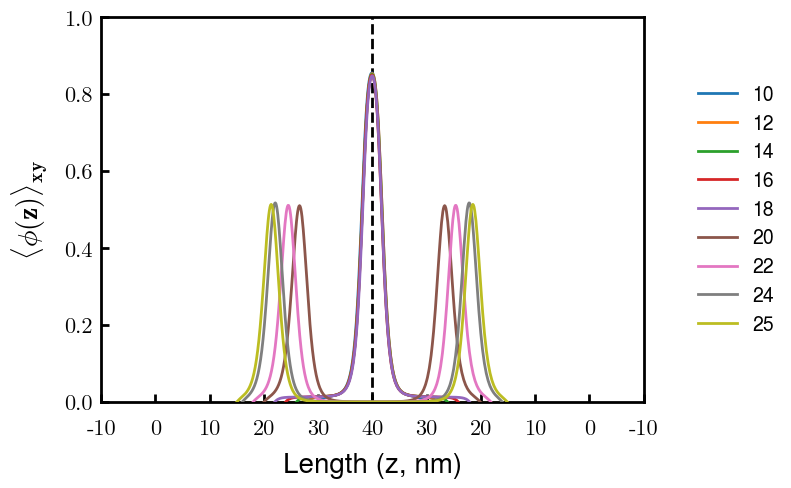

In [24]:
# NFH
labs = [10, 12, 14, 16, 18, 20, 22, 24, 25]
read_list = [GIT+'ph_H50cd{:05d}.dat'.format(int(i*1000)) for i in labs]

max_d = 40 #Distance to center (Lx/2)
shifts = [max_d-float(i) for i in labs]
fig, ax = tjy.plot_pha(read_list, x1_shift=shifts,
                       x1_start = -10, x1_end=max_d*2+10, y1_end=1.00, labs=labs, double=False, show=False)
plt.sca(ax)
plt.plot([max_d]*2,[0,1], '--', lw =2, color='k')
step = 10
plt.xlim(-step, step)
xrange = np.arange(-1*step, max_d*2+step+0.1, step)
xsim = np.concatenate([np.arange(-1*step, max_d+0.1, step), np.arange(max_d-step, -1*(step+0.1), -step)])
plt.xticks(xrange, ['{:.0f}'.format(i) for i in xsim])
plt.legend(frameon=True, framealpha=1.0, facecolor='w', edgecolor='w', loc='center left', bbox_to_anchor=(1.05,0.5))
plt.show()

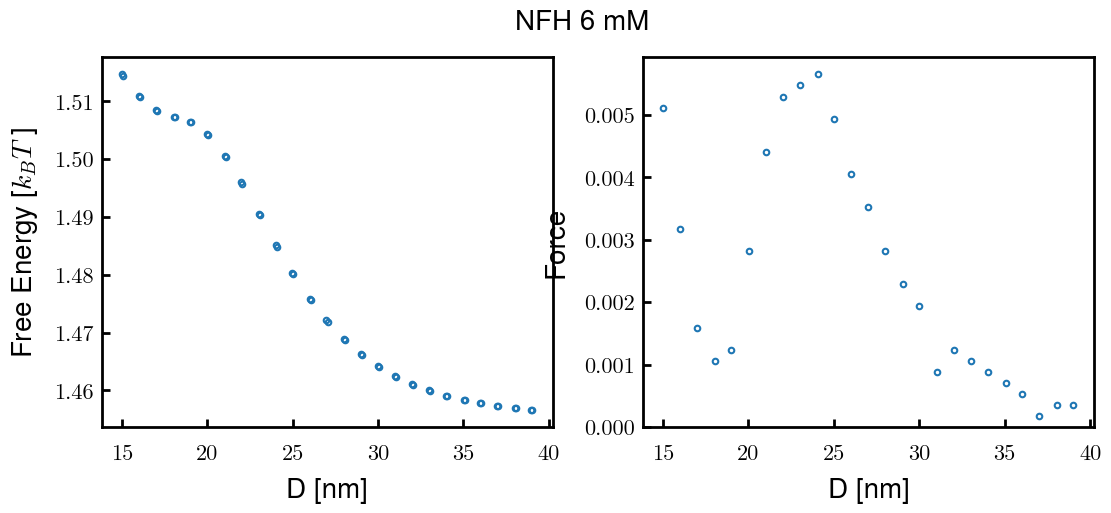

In [20]:
def CalcF(nx, y, dx=17/150):
    d = [(i*dx)/2 for i in nx]
    d1, y1 = [i for ind, i in enumerate(d) if not ind % 2], [i for ind, i in enumerate(y) if not ind % 2]
    d2, y2 = [i for ind, i in enumerate(d) if ind % 2]    , [i for ind, i in enumerate(y) if ind % 2]
    xf, yf = np.average([d1, d2], axis=0), [(y2[i]-y1[i])/(d1[i]-d2[i]) for i in range(round(len(d)/2))] # Force from squeezing (-dx)
    return d, xf, yf

freeE = pd.read_csv(GIT+'NFH_06.txt', sep="\s+", skiprows=0, names = ['it', 'nx', 'freeE', 'freeDiff', 'inCompMax', 'andErr']).sort_values(by='nx', ignore_index=True)
nx, y = freeE.nx, freeE.freeE
d, x06f, y06f = CalcF(nx, y)

## Plotting
fs = (plt.rcParams['figure.figsize'][0]*2,  plt.rcParams['figure.figsize'][1])
f, axs = plt.subplots(1,2, figsize=fs)
axs[0].plot(d, y, 'o', ms=4, markerfacecolor='none',  c='C0', label='Raw')

axs[1].plot(x06f, y06f, 'o', ms=4, markerfacecolor='none',  c='C0', label='Raw')

axs[0].set_xlabel('D [nm]')
axs[0].set_ylabel('Free Energy 'r'[$k_BT~$]')
axs[1].set_xlabel('D [nm]')
axs[1].set_ylabel('Force')
axs[1].set_ylim([0.0, None])
plt.suptitle('NFH 6 mM', fontsize=20)

tjy.ticks(axs)
plt.show()

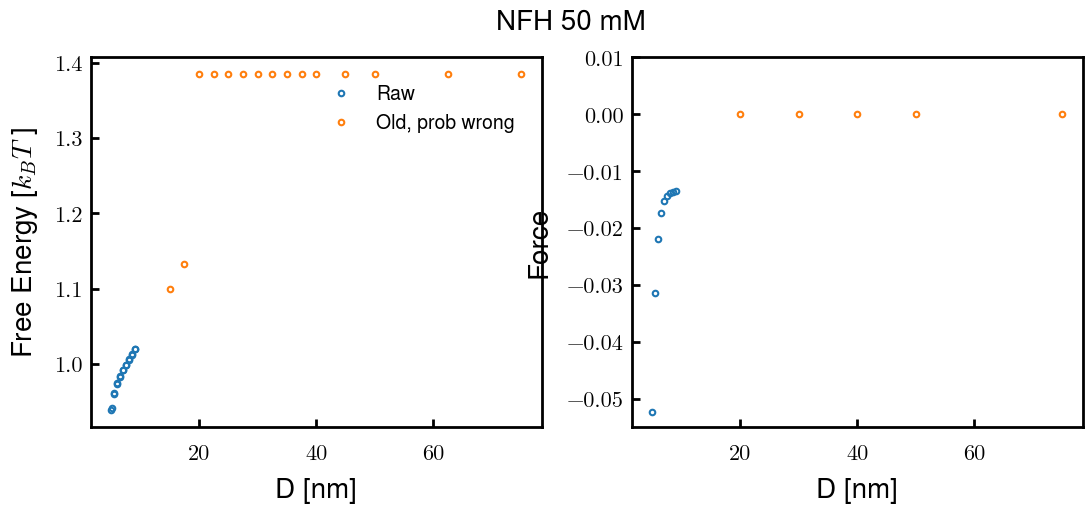

In [111]:
freeE = pd.read_csv(GIT+'NFH_50sweep.txt', sep="\s+", skiprows=0, names = ['it', 'lx', 'freeE', 'freeDiff', 'inCompMax', 'andErr']).sort_values(by='lx', ignore_index=True)
dsweep, ysweep = freeE.lx/2, freeE.freeE
freeE = pd.read_csv(GIT+'NFH_50.txt', sep="\s+", skiprows=0, names = ['it', 'lx', 'freeE', 'freeDiff', 'inCompMax', 'andErr']).sort_values(by='lx', ignore_index=True)
y = freeE.freeE
d = [ (round(i)+17/150)/2 if np.mod(i, 1) else i/2 for i in freeE.lx ] # Fix true Lx value for artificial Lx with added 1*dx

x50f, y50f = CalcF(d, y)
xsweepf, ysweepf = [20, 30, 40, 50, 75], [0.0]*5

## Plotting
fs = (plt.rcParams['figure.figsize'][0]*2,  plt.rcParams['figure.figsize'][1])
f, axs = plt.subplots(1,2, figsize=fs)
axs[0].plot(d, y, 'o', ms=4, markerfacecolor='none',  c='C0', label='Raw')
axs[0].plot(dsweep, ysweep, 'o', ms = 4, markerfacecolor='none', c='C1', label='Old, prob wrong')
axs[0].legend()
# axs[0].plot(d, y, c='C0', label='_Raw')

axs[1].plot(x50f, y50f, 'o', ms=4, markerfacecolor='none',  c='C0', label='Raw')
axs[1].plot(xsweepf, ysweepf, 'o', ms=4, markerfacecolor='none',  c='C1', label='Raw')
# axs[1].plot(x04f, y04f, c='C0', label='_Raw')

axs[0].set_xlabel('D [nm]')
axs[0].set_ylabel('Free Energy 'r'[$k_BT~$]')
axs[1].set_xlabel('D [nm]')
axs[1].set_ylabel('Force')
axs[1].set_ylim([None, 0.01])
plt.suptitle('NFH 50 mM', fontsize=20)

tjy.ticks(axs)
plt.show()

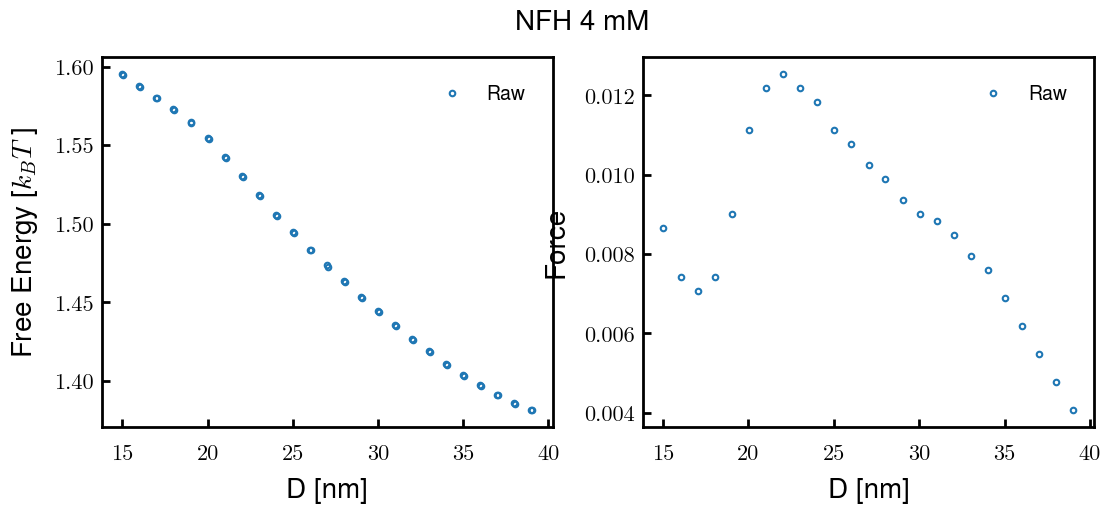

In [9]:
freeE = pd.read_csv(GIT+'NFH_04.txt', sep="\s+", skiprows=0, names = ['it', 'lx', 'freeE', 'freeDiff', 'inCompMax', 'andErr']).sort_values(by='lx', ignore_index=True)
d, y = freeE.lx/2, freeE.freeE
d = [ (round(i)+17/150)/2 if np.mod(i, 1) else i/2 for i in freeE.lx ] # Fix true Lx value for artificial Lx with added 1*dx
x04f, y04f = CalcF(d, y)
x04f[12] += 17/150/2 # Runs actually 2*dx apart
y04f[12] *= 0.5 # Runs actually 2*dx apart

## Plotting
fs = (plt.rcParams['figure.figsize'][0]*2,  plt.rcParams['figure.figsize'][1])
f, axs = plt.subplots(1,2, figsize=fs)
axs[0].plot(d, y, 'o', ms=4, markerfacecolor='none',  c='C0', label='Raw')
# axs[0].plot(d, y, c='C0', label='_Raw')

axs[1].plot(x04f, y04f, 'o', ms=4, markerfacecolor='none',  c='C0', label='Raw')
# axs[1].plot(x04f, y04f, c='C0', label='_Raw')

axs[0].set_xlabel('D [nm]')
axs[0].set_ylabel('Free Energy 'r'[$k_BT~$]')
axs[0].legend()
axs[1].legend()
axs[1].set_xlabel('D [nm]')
axs[1].set_ylabel('Force')
plt.suptitle('NFH 4 mM', fontsize=20)

tjy.ticks(axs)
plt.show()

353
Fail: 353 N versus 352 New


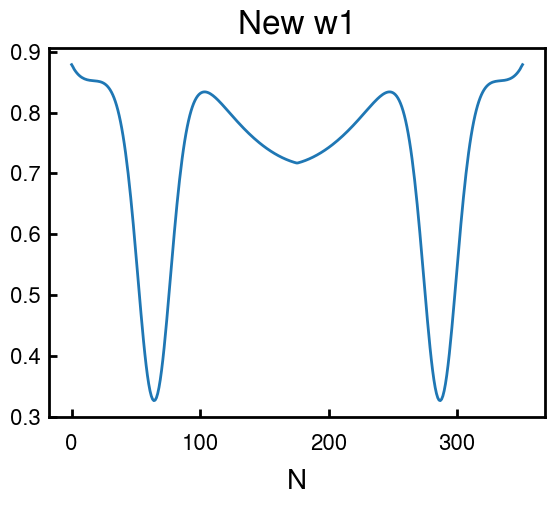

In [95]:
## Adjust D (half-space)
filename = 'W_a020d020.dat' #Nx = 100, dx = 17.0/150
dx = 17/150
new_Lx = 40
N = round(new_Lx / dx)

names = ['*', 'w1','w2','w3','w4','w5', '**', 'wb', 'eta', 'pot_elec']
df = pd.read_csv(GIT+filename, sep='\s+', skiprows=0, names=names)
old_N = len(df.index)
print(old_N)
# display(df)

if N > old_N: 
    rem = ['['] + [1.00]*5 + [']'] + [-1.00]*2 + [0.00]
    rem = pd.DataFrame([rem for i in range(N-old_N)], columns=names)
    new = pd.concat([df.iloc[:round(old_N/2)], rem, df.iloc[:round(old_N/2):-1]], ignore_index=True)
else: 
    shave = df.iloc[0:round(N/2),:]
    new = pd.concat([shave, shave.iloc[::-1]], ignore_index=True)
    
if N == len(new.index): 
    print('Success: {:d} == {:d}.'.format(N, len(new.index)))
    new.to_csv('./imgs/W_sym{}.dat'.format(new_Lx), sep='\t', float_format='%10.5e', header=False, index=False)
else:
    print('Fail: {:d} N versus {:d} New'.format(N, len(new.index)))
    
if True: 
    plt.plot(new.w1)
    plt.title('New w1')
    plt.xlabel('N')

Success: 882 == 882.


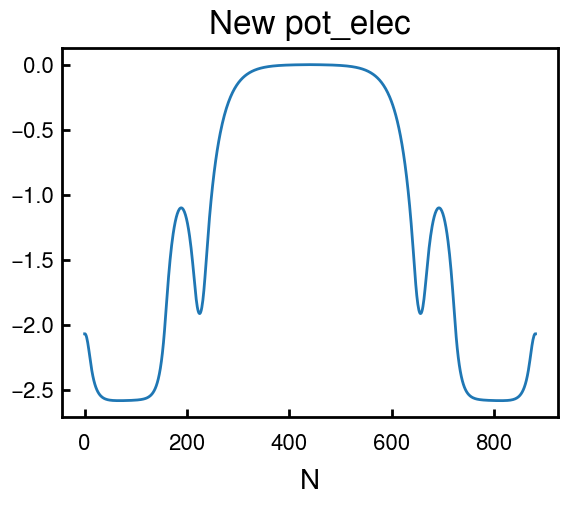

In [108]:
## SINGLE --> DOUBLE WA
filename = 'W_a040c010_x175s002.dat' #Nx = 100, dx = 17.0/150
dx = 17/150
new_Lx = 100
N = round(new_Lx / dx)

names = ['*', '1','2','3','4','5', '**', 'wb', 'eta', 'pot_elec']
df = pd.read_csv(GIT+filename, sep='\s+', skiprows=0, names=names)
# display(df)

if N > 2*len(df.index): 
    rem = ['['] + [1.00]*5 + [']'] + [-1.00]*2 + [0.00]
    rem = pd.DataFrame([rem for i in range(N-2*len(df.index))], columns=names)
    new = pd.concat([df, rem, df.iloc[::-1]], ignore_index=True)
else: 
    shave = df.iloc[0:round(N/2),:]
    new = pd.concat([shave, shave.iloc[::-1]], ignore_index=True)
    
if N == len(new.index): 
    print('Success: {:d} == {:d}.'.format(N, len(new.index)))
    new.to_csv('./imgs/W_sym{}.dat'.format(new_Lx), sep='\t', float_format='%10.5e', header=False, index=False)
else:
    print('Fail: {:d} N versus {:d} New'.format(N, len(new.index)))
    
if True: 
    plt.plot(new.pot_elec)
    plt.title('New pot_elec')
    plt.xlabel('N')

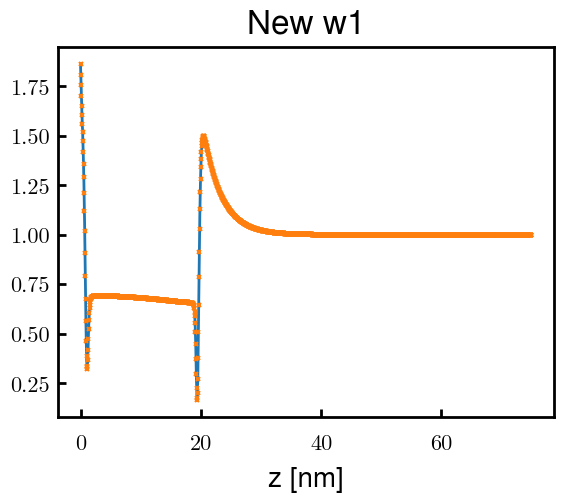

In [140]:
## SINGLE dx1 --> dx2
from scipy.interpolate import CubicSpline
filename = 'W_a040c010_x200s002.dat' #Nx = 75, dx = 17.0/150
dx1 = 17.0/150 # Old
dx2 = 0.05 # New
Lx = 75
Nx1, Nx2 = round(Lx/dx1), round(Lx/dx2)

x1 = np.arange(0, Lx, dx1)
x2 = np.arange(0, Lx, dx2)

names = ['*', 'w1','w2','w3','w4','w5', '**', 'wb', 'eta', 'pot_elec']
df = pd.read_csv(GIT+filename, sep='\s+', skiprows=0, names=names)

if True: 
    test_frame = df.w1
    cs = CubicSpline(x1, test_frame)
    plt.plot(x1, test_frame)
    plt.plot(x2, cs(x2), 'x', markerfacecolor='w', ms=3)

    plt.title('New w1')
    plt.xlabel('z [nm]')
    tjy.ticks()
    plt.show()

A = []
for i in [1, 2, 3, 4, 5, 7, 8, 9]:
    cs = CubicSpline(x1, df.iloc[:, i])
    A = [*A, cs(x2)]
fill = np.array(['[']*(Nx2))
A = [fill, A[0], A[1], A[2], A[3], A[4], fill, A[5], A[6], A[7]]
new = pd.DataFrame(A).transpose()
new.to_csv('./imgs/W_dx{}.dat'.format(dx2*100), sep='\t', float_format='%10.5e', header=False, index=False)